In [117]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

### Data loading


In [118]:
TRAIN_FILEPATH = os.path.join('..', 'input', 'train.csv')
TEST_FILEPATH = os.path.join('..', 'input', 'test.csv')

df_train = pd.read_csv(TRAIN_FILEPATH, index_col=0)
df_test = pd.read_csv(TEST_FILEPATH, index_col=0)

df_train.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
id,,,,,,,,,,
id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


### Data preprocessing

#### Gestion des outliers

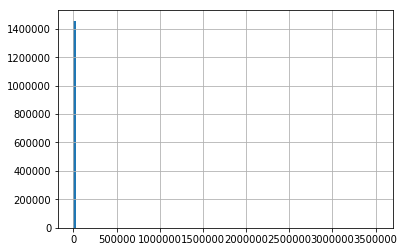

In [119]:
df_train["trip_duration"].hist(bins=100)

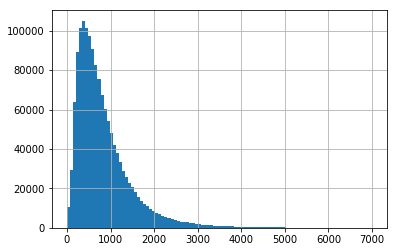

In [120]:
df_train.loc[df_train["trip_duration"] < 7000, "trip_duration"].hist(bins=100)

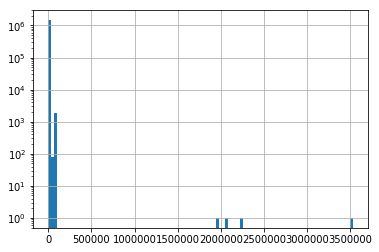

In [121]:
# Gestion des outliers
df_train['trip_duration'].hist(bins=100, log=True);

Cette transformation des données permet de mettre en évidence quelques outliers

#### Gestion des données manquantes

In [122]:
df_train.isna().sum()

vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

Il n'ya aucune donnée manquante

In [123]:
df_train.isnull().sum()

vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

Aucune donnée nulle

#### Gestion des données dupliquées

In [124]:
df_train.duplicated().sum()

7

In [125]:
df_train[df_train.duplicated()]

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
id,,,,,,,,,,
id2386705,2,2016-03-06 10:06:31,2016-03-07 09:59:05,4,-73.997055,40.737183,-73.991913,40.734577,N,85954
id0946562,2,2016-03-05 18:22:41,2016-03-05 18:25:10,2,-73.997292,40.691071,-73.999428,40.683388,N,149
id1999875,2,2016-06-09 16:17:06,2016-06-09 16:24:22,2,-73.958359,40.778519,-73.947296,40.779682,N,436
id3429539,2,2016-05-04 14:54:59,2016-05-04 14:57:28,4,-73.958336,40.800922,-73.959106,40.801910,N,149
id0133335,2,2016-02-16 21:36:35,2016-02-16 21:37:06,2,-74.008034,40.723553,-74.008034,40.723553,N,31
id0146524,2,2016-03-12 16:41:35,2016-03-12 16:47:54,1,-73.974533,40.742298,-73.979507,40.750549,N,379
id0978620,2,2016-01-21 12:04:53,2016-01-21 13:35:06,3,-73.800667,40.645954,-73.985809,40.763363,N,5413


Il ne semble pas nécessaire de supprimer ces données. Aucune des colonnes ne semble être réellement en double dans ces données

#### Gestion des données catégoriques

In [126]:
# Gestion des données catégoriques
CAT_COL = "store_and_fwd_flag"
df_train[CAT_COL] = df_train[CAT_COL].astype('category').cat.codes
df_test[CAT_COL] = df_test[CAT_COL].astype('category').cat.codes

### Features engineering

#### Features creation

Création de la colonne "distance" qui contiendra la distance entre les coordonnées géographique de départ (pickup_latitude, pickup_longitude) et d'arrivée (dropoff_latitude, dropoff_longitude)

La formule donnée par Wikipédia pour calculer la distance à vol d'oiseau
$$M = 60\arccos \,[\sin(\varphi_A)\sin(\varphi_B) + \cos(\varphi_A)\cos(\varphi_B) \cos (\lambda_B - \lambda_A)]\,$$

In [127]:
import math
from geopy.distance import geodesic

def compute_distance(df):
    pointA = (df["pickup_latitude"], df["pickup_longitude"])
    pointB = (df["dropoff_latitude"], df["dropoff_longitude"])

    return geodesic(pointA, pointB).miles
    
df_train["distance"] = df_train.apply(compute_distance, axis=1)
df_train.head(20)

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,distance
id,,,,,,,,,,,
id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,0,455,0.933406
id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,0,663,1.123849
id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,0,2124,3.964154
id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,0,429,0.921886
id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,0,435,0.737591
id0801584,2,2016-01-30 22:01:40,2016-01-30 22:09:03,6,-73.982857,40.742195,-73.992081,40.749184,0,443,0.683275
id1813257,1,2016-06-17 22:34:59,2016-06-17 22:40:40,4,-73.969017,40.757839,-73.957405,40.765896,0,341,0.824764
id1324603,2,2016-05-21 07:54:58,2016-05-21 08:20:49,1,-73.969276,40.797779,-73.922470,40.760559,0,1551,3.553009
id1301050,1,2016-05-27 23:12:23,2016-05-27 23:16:38,1,-73.999481,40.738400,-73.985786,40.732815,0,255,0.815587


In [128]:
df_test["distance"] = df_test.apply(compute_distance, axis=1)
df_test.head(20)

,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,distance
id,,,,,,,,,
id3004672,1,2016-06-30 23:59:58,1,-73.988129,40.732029,-73.990173,40.756680,0,1.704336
id3505355,1,2016-06-30 23:59:53,1,-73.964203,40.679993,-73.959808,40.655403,0,1.712358
id1217141,1,2016-06-30 23:59:47,1,-73.997437,40.737583,-73.986160,40.729523,0,0.812202
id2150126,2,2016-06-30 23:59:41,1,-73.956070,40.771900,-73.986427,40.730469,0,3.272749
id1598245,1,2016-06-30 23:59:33,1,-73.970215,40.761475,-73.961510,40.755890,0,0.597601
id0668992,1,2016-06-30 23:59:30,1,-73.991302,40.749798,-73.980515,40.786549,0,2.598299
id1765014,1,2016-06-30 23:59:15,1,-73.978310,40.741550,-73.952072,40.717003,0,2.183113
id0898117,1,2016-06-30 23:59:09,2,-74.012711,40.701527,-73.986481,40.719509,0,1.853780
id3905224,2,2016-06-30 23:58:55,2,-73.992332,40.730511,-73.875618,40.875214,0,11.711224


Création de la colonne "pickup_hour" et "pickup_day" car selon les jours et les heures (jours de travail, matin à 8h ou soir à 22h), le temps d'un trajet peut varier suivant le traffic routier

In [129]:
df_train["pickup_hour"] = pd.to_datetime(df_train.pickup_datetime).dt.hour
df_train["pickup_day"] = pd.to_datetime(df_train.pickup_datetime).dt.dayofweek

df_test["pickup_hour"] = pd.to_datetime(df_test.pickup_datetime).dt.hour
df_test["pickup_day"] = pd.to_datetime(df_test.pickup_datetime).dt.dayofweek

df_train.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,distance,pickup_hour,pickup_day
id,,,,,,,,,,,,,
id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,0,455,0.933406,17,0
id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,0,663,1.123849,0,6
id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,0,2124,3.964154,11,1
id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,0,429,0.921886,19,2
id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,0,435,0.737591,13,5


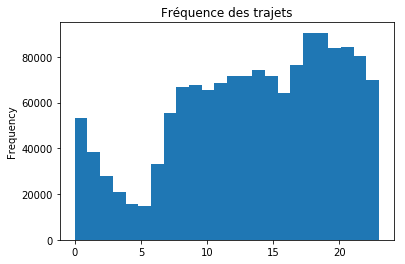

In [130]:
df_train["pickup_hour"].plot.hist(bins=24, title="Fréquence des trajets")

Il semble y avoir moins de trajets très tôt en matinée

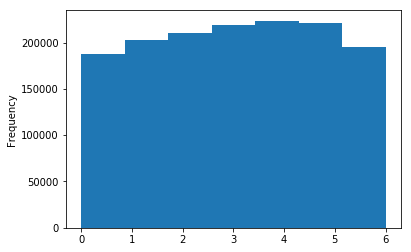

In [131]:
df_train['pickup_day'].plot.hist(bins=7)

La variation en fonction du jour est cependant plus faible.

Je vérifie que le traitement n'a pas généré de valeurs nulles

In [132]:
df_train.isnull().sum()

vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
distance              0
pickup_hour           0
pickup_day            0
dtype: int64

In [133]:
df_test.isna().sum()

vendor_id             0
pickup_datetime       0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
distance              0
pickup_hour           0
pickup_day            0
dtype: int64

#### Features selection

In [134]:
FEATURES = ["pickup_latitude", "pickup_longitude", "dropoff_latitude", "dropoff_longitude", "pickup_hour", "pickup_day", "distance"]
TARGET = 'trip_duration'

In [135]:
X_train = df_train[FEATURES]
Y_train = df_train[TARGET]

X_test = df_test[FEATURES]

X_train.shape, Y_train.shape

((1458644, 7), (1458644,))

### Model Selection

In [136]:
from sklearn.ensemble import RandomForestRegressor

m1 = RandomForestRegressor()
m1.fit(X_train, Y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

### Validation

In [137]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(m1, X_train, Y_train, cv=5, scoring='neg_mean_squared_log_error')
cv_scores

array([-0.29872012, -0.30242558, -0.30291835, -0.3007131 , -0.30203234])

### Prediction

In [138]:
predictions = m1.predict(X_test)
predictions[:10]

array([ 850.9,  695.8,  369.6,  923.4,  506.3,  927.4, 1209.9, 9358.5,
       1999.7,  511.2])

### Submission

In [139]:
submission = pd.DataFrame({'id': df_test.index, 'trip_duration': predictions})
submission.to_csv('submission.csv', index=False)

submission.head()

,id,trip_duration
0,id3004672,850.9
1,id3505355,695.8
2,id1217141,369.6
3,id2150126,923.4
4,id1598245,506.3
